In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

\begin{equation}
    \begin{cases}
        \dfrac{du^2}{dx^2} = C_1 \delta'(x-x_0) + C_2, \quad 0 < x < 1\\
        u(0) = u(1) = 0
    \end{cases}
\end{equation}

In [36]:
# Define constants
C1 = 1.0
C2 = 100.0
x0 = 0.5
N = 100
h = 1/(N-1)
index_x0 = int(x0/h)
x = Symbol('x')
f = C1*diff(DiracDelta(x-x0), x) + C2 

In [38]:
# Fill in the matrix A and vector b
A = np.zeros((N,N))
A[0,0] = 1
A[-1,-1] = 1
b = np.zeros(N)
b[0] = 0 
b[-1] = 0
for i in range(1,N-1):
    A[i,i-1] = -1/h
    A[i,i] = 2/h
    A[i,i+1] = -1/h
    
    # Symbolic:
    # -----------------------------------------------------------------------------------------------------------------
    Psi_left = (x-(i-1)*h)/h
    Psi_right = ((i+1)*h-x)/h
    b[i] = float(integrate(Psi_left * f, (x, (i-1)*h, i*h)) + integrate(Psi_right * f, (x, i*h, (i+1)*h)))
    
    # Numerical:
    # -----------------------------------------------------------------------------------------------------------------
    # if i == index_x0:
    #     b[i] = C1/h + C2*h
    # elif i == index_x0 + 1:
    #     b[i] = -C1/h + C2*h
    # else:
    #     b[i] = C2*h

# Solve the linear system
u = np.linalg.solve(A,b)

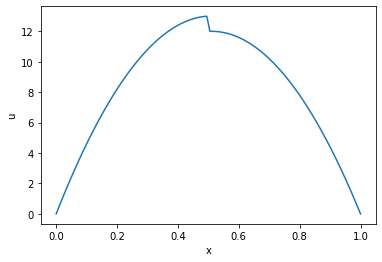

In [39]:
# Plot the solution
x = np.linspace(0,1,N)
plt.plot(x,u)
plt.xlabel('x')
plt.ylabel('u')
plt.show()